### Импорт библиотек

Импорт Керас

In [ ]:
from tensorflow import keras as k

### Структура нейронной сети

#Формирование структуры с помощью Sequential API

1-ый способ

In [ ]:
model_01 = k.Sequential()
model_01.add(k.layers.Conv2D(20,(5, 5), activation = 'relu', input_shape = (28, 28, 3)))
model_01.add(k.layers.MaxPool2D(pool_size = (2, 2)))
model_01.add(k.layers.Conv2D(40,(5, 5), activation = 'relu'))
model_01.add(k.layers.MaxPool2D(pool_size = (2, 2)))
model_01.add(k.layers.Flatten())
model_01.add(k.layers.Dense(500, activation = 'sigmoid'))
model_01.add(k.layers.Dense(10, activation = 'softmax'))

model_01.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics=['acc'])

print(model_01.summary())
20*5*5*3+20
40*5*5*20+40

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 20)          │           1,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 40)            │          20,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 40)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 640)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         320,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347,070 (1.32 MB)

 Trainable params: 347,070 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

None


20040

2-ой способ

In [ ]:
model_02 = k.Sequential([
    k.layers.Dense(120, activation='tanh', input_shape=(32,)),
    k.layers.Dense(1, activation='sigmoid')
    ])

model_02.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

print(model_02.summary())
32*120+120

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 120)                 │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,081 (15.94 KB)

 Trainable params: 4,081 (15.94 KB)

 Non-trainable params: 0 (0.00 B)

None


3960

#Структура нейронной сети рапознавание образов с помощью MLP (Dense, многослойный персептрон)

In [ ]:
model_03 = k.Sequential([
    k.layers.Flatten(input_shape=(28, 28, 1)),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(10, activation='softmax')
])
print(model_03.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
784*128+128

100480

#Функциональное API Keras на задаче регрессии

In [ ]:
inputs = k.Input(shape=(784,))
dense = k.layers.Dense(64, activation="relu")
x = dense(inputs)
x = k.layers.Dense(64, activation="relu")(x)
outputs = k.layers.Dense(10)(x)
model = k.Model(inputs=inputs, outputs=outputs, name="mnist_model")


NameError: name 'k' is not defined

In [ ]:
model.summary()

Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

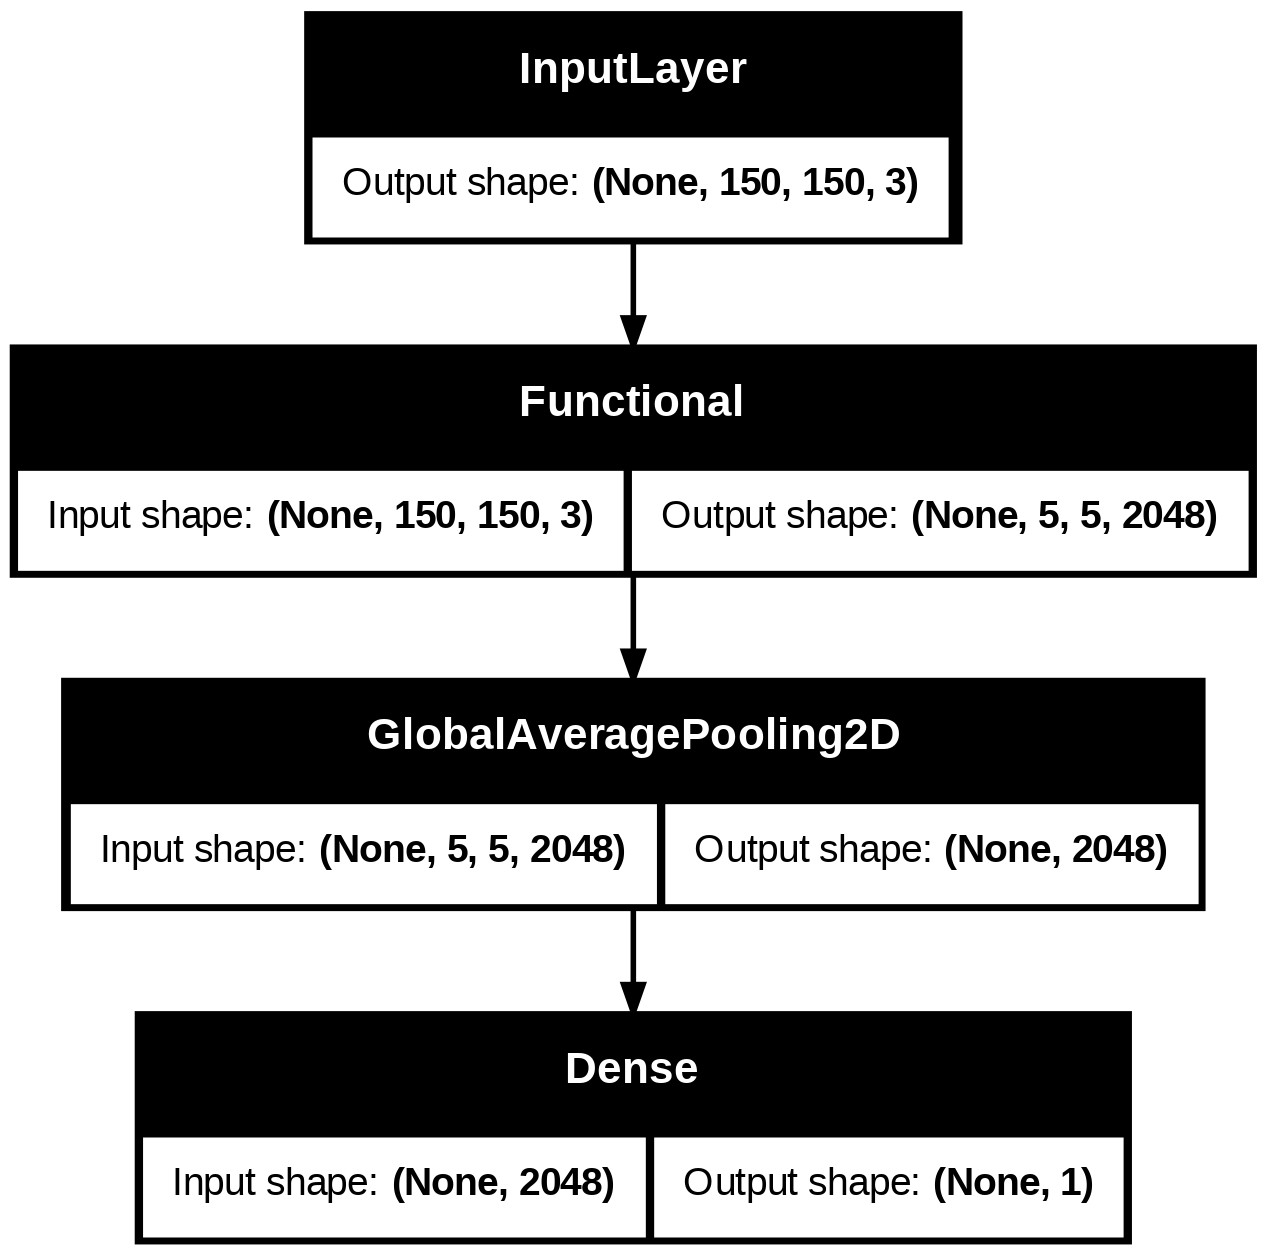

In [ ]:
k.utils.plot_model(model, "my_first_model.png", show_shapes=True)

#Transfer-learning

обрезали вход (input_shape)

обрезали выход (classes)

без сохранения весов (weights = none)

In [ ]:
from tensorflow.keras.applications import ResNet50V2
model_res = ResNet50V2(classes=2, input_shape=(128, 128, 1), classifier_activation='sigmoid',weights=None)

сохранение 'верхушки' модели (слоя классификации) (include_top=True)

In [ ]:
import keras
base_model = keras.applications.Xception(
    weights='imagenet',  # Загрузка предобученных весов на базе данных ImageNet.
    input_shape=(299, 299, 3),
    include_top=True)
# base_model.summary()

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


на фходе даммые другой размерности => обрезаем верзушку и корректируем вход

In [ ]:
import keras as k
base_model = k.applications.Xception(
    weights='imagenet',
    input_shape=(150, 150, 3),
    include_top=False)
# заморозка базовой модели
base_model.trainable = False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
inputs = k.Input(shape=(150, 150, 3))

# Предобученные веса нейронной сети Xception требуют, чтобы входные данные были нормализованы
# было (0, 255), стало (-1., +1.), для этого можно вставить rescaling layer
# outputs: `(inputs * scale) + offset`
# не делим на 255 offset=0 тк тогда даыннфе будут иметь диапазон (0;1)
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(inputs)
x = base_model(x, training=False) #training=False сохраняет преобразования в слоях bacthnorm (не рассчитываются снова СКО и мат. ожидание)
# По умолчанию во время обучения training=True, а во время инференса training=False
x = k.layers.GlobalAveragePooling2D()(x)
outputs = k.layers.Dense(1)(x)
model = k.Model(inputs, outputs)

training=False — этот аргумент указывает, что модель должна работать в режиме инференса (прогнозирования), а не обучения. Это важно, потому что некоторые слои, такие как BatchNormalization или Dropout, ведут себя по-разному во время обучения и инференса. В режиме инференса модель будет использовать накопленные параметры (например, средние значения и дисперсии в слоях BatchNormalization), а не обновлять их.

GlobalAveragePooling2D — это слой, который выполняет глобальное усреднение (global average pooling) по двум пространственным осям (высоте и ширине) для каждого канала (или фильтра) на входе.

При применении этого слоя к тензору с размерами (например, (batch_size, height, width, channels)), он усредняет все значения на каждом канале, сокращая размерность с (batch_size, height, width, channels) до (batch_size, channels).

Например, если размер входа x был (32, 8, 8, 64) (32 изображения, размер 8x8 и 64 канала), после применения слоя GlobalAveragePooling2D размер выходных данных будет (32, 64), т.е. для каждого из 64 каналов будет одно усредненное значение.

Этот слой обычно используется перед полносвязными слоями, чтобы уменьшить размерность и оставить только самую важную информацию о признаках.

Итого мы взяли за основу модель Xception, добавили свой входной слой и свой выходной слой. Xception для извлечения признаков (экстрактор прихнаков)

In [ ]:
print(model.summary())

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 5, 5, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,863,529 (79.59 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

None
